In [1]:
import pandas as pd
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt

# Load the different data sets (1000 samples)
data_benign = pd.read_csv('data/benign_def_before.dat',
            header=None, sep=',')
print("First data set loaded")
data_mal = pd.read_csv('data/benign_def_Mal_before.dat',
            header=None, sep=',')
print("Second data set loaded")
data_mal_modified = pd.read_csv('data/benign_def_mal_after.dat',
            header=None, sep=',')
print("Third data set loaded")

data_mal_trained = pd.read_csv('data/benign_trained_mal_before.dat',
            header=None, sep=',')
print("Fourth data set loaded")

data_mal_modified_trained = pd.read_csv('data/benign_trained_mal_after.dat',
            header=None, sep=',')
print("Fifth data set loaded")


First data set loaded
Second data set loaded
Third data set loaded
Fourth data set loaded
Fifth data set loaded


In [5]:
from scipy import spatial
import math
cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_benign[i], data_mal[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
print("Similarity between benign and malicious " + str(np.mean(cosine_similarities)))

cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_benign[i], data_mal_modified[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
print("Similarity between benign and modified malicious " + str(np.mean(cosine_similarities)))

cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_mal_modified[i], data_mal[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
print("Similarity between malicious and modififed malicious " + str(np.mean(cosine_similarities)))


cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_mal_trained[i], data_mal_modified_trained[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
print("Similarity between malicious and modififed malicious (trained) " + str(np.mean(cosine_similarities)))

cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_mal[i], data_mal_trained[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
print("Similarity between malicious and modififed (trained) " + str(np.mean(cosine_similarities)))

Similarity between benign and malicious 0.10304919268909528
Similarity between benign and modified malicious 0.1246994524127084
Similarity between malicious and modififed malicious 0.7495427955126407
Similarity between malicious and modififed malicious (trained) 0.7225115740639904
Similarity between malicious and modififed (trained) 0.08948540130563146


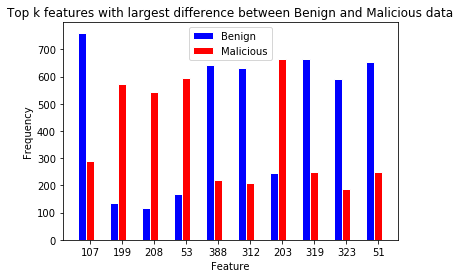

In [3]:
import familiarization as fm
# Compute the summation of each column/feature
sum_column_benign = data_benign.sum(axis = 0, skipna = True)
sum_column_mal = data_mal.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_mal = abs(sum_column_benign - sum_column_mal)
diff_benign_mal = diff_benign_mal.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_df = pd.DataFrame()
plot_df_mal = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_mal.index[i]
    columns.append(cur_feature_name)
    plot_df[cur_feature_name] = data_benign[cur_feature_name] 
    plot_df_mal[cur_feature_name] = data_mal[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df, plot_df_mal, columns, "Benign", "Malicious")

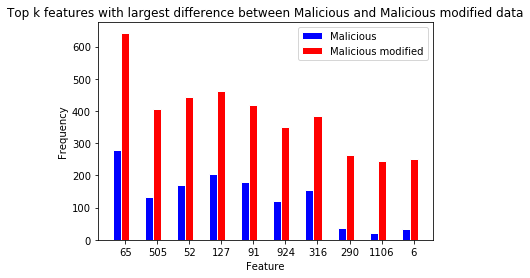

In [4]:
# Sum values of each column
sum_column_mal = data_mal.sum(axis = 0, skipna = True)
sum_column_mod = data_mal_modified.sum(axis = 0, skipna = True)

# Difference between  malicious and modified malicious
diff_mod_mal = abs(sum_column_mod - sum_column_mal)
diff_mod_mal = diff_mod_mal.sort_values(ascending=False)

# Create dataframe for plotting
plot_df_mal = pd.DataFrame()
plot_df_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mod_mal.index[i]
    columns.append(cur_feature_name)
    plot_df_mal[cur_feature_name] = data_mal[cur_feature_name] 
    plot_df_mod[cur_feature_name] = data_mal_modified[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df_mal, plot_df_mod, columns, "Malicious", "Malicious modified")

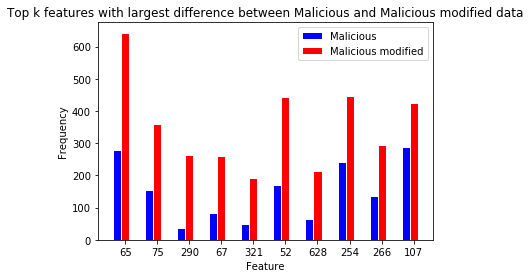

In [9]:
# Sum values of each column
sum_column_mal_trained = data_mal_trained.sum(axis = 0, skipna = True)
sum_column_mod_trained = data_mal_modified_trained.sum(axis = 0, skipna = True)

# Difference between malicious and modified malicious with trained network
diff_mod_mal_trained = abs(sum_column_mal_trained - sum_column_mod_trained)
diff_mod_mal_trained = diff_mod_mal_trained.sort_values(ascending=False)

# Create dataframe for plotting
plot_df_mal_trained = pd.DataFrame()
plot_df_mod_trained = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mod_mal_trained.index[i]
    columns.append(cur_feature_name)
    plot_df_mal_trained[cur_feature_name] = data_mal_trained[cur_feature_name] 
    plot_df_mod_trained[cur_feature_name] = data_mal_modified_trained[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df_mal, plot_df_mod, columns, "Malicious", "Malicious modified")